# Assignment 2

## Problem : Image Matching

Implement exercises 4.2 and 4.4 in the Szeliski book.  I recommend using SIFT for 4.2, although you can choose another image descriptor, if you wish.  For your images, you can use any pair you like.  I have supplied a test pair on the class site: first_image and second_image.  Once you have a feature matching algorithm that works on a simple case, try it on a more challenging case.

**Ex 4.2:** 
Interest point descriptor Implement one or more descriptors (steered to local scale and orientation) and compare their performance (with your own or with a classmate’s detector).


Some possible descriptors include
* Contrast-normalized patches (Brown, Szeliski, and Winder 2005);
* SIFT (Lowe 2004);
* GLOH (Mikolajczyk and Schmid 2005);
* DAISY (Winder and Brown 2007; Tola, Lepetit, and Fua 2010).
* Other detectors are described by Mikolajczyk and Schmid (2005).

In [5]:
#Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
figsize = (10,10)

first_image


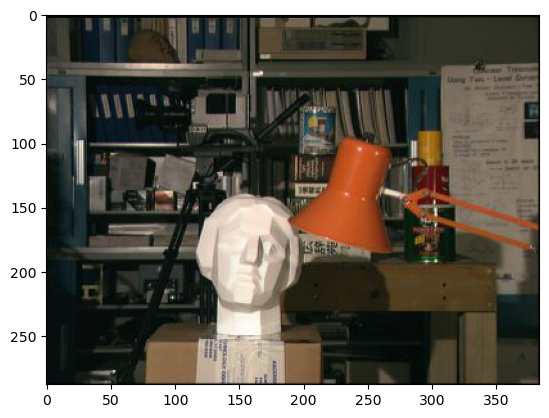

second_image


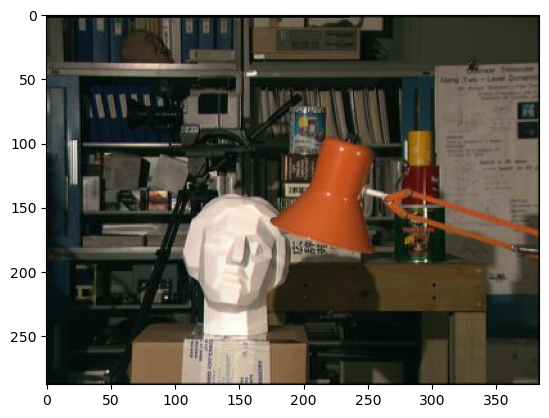

In [6]:
#Get the images
rgb_l = cv2.cvtColor(cv2.imread("/Users/kavanamanvi/Desktop/ComputerVision/HW2/first_image.jpg"),cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l,cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread("/Users/kavanamanvi/Desktop/ComputerVision/HW2/second_image.jpg"),cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r,cv2.COLOR_RGB2GRAY)

#Display the images
print("first_image")
plt.imshow(rgb_l)
plt.show()

print("second_image")
plt.imshow(rgb_r)
plt.show()

[ WARN:0@2.006] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


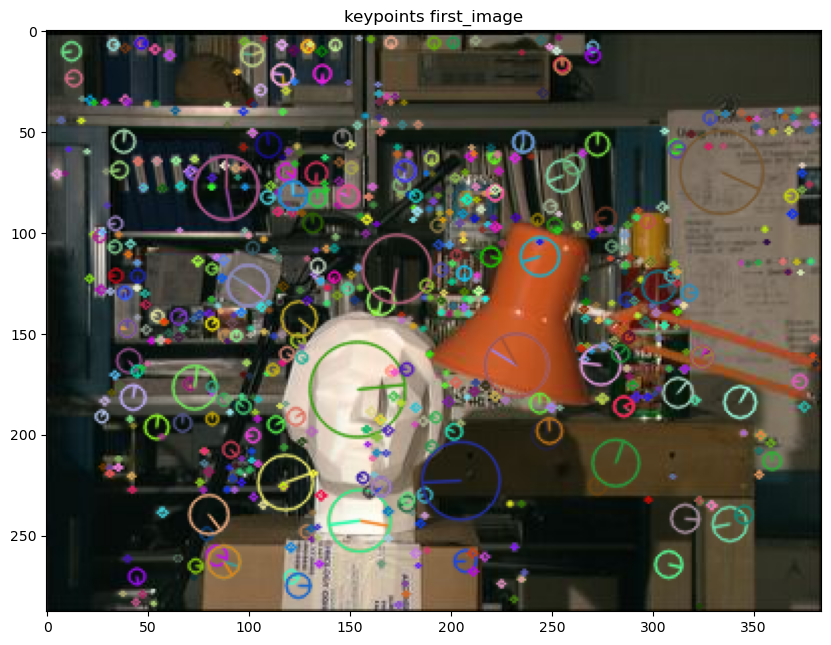

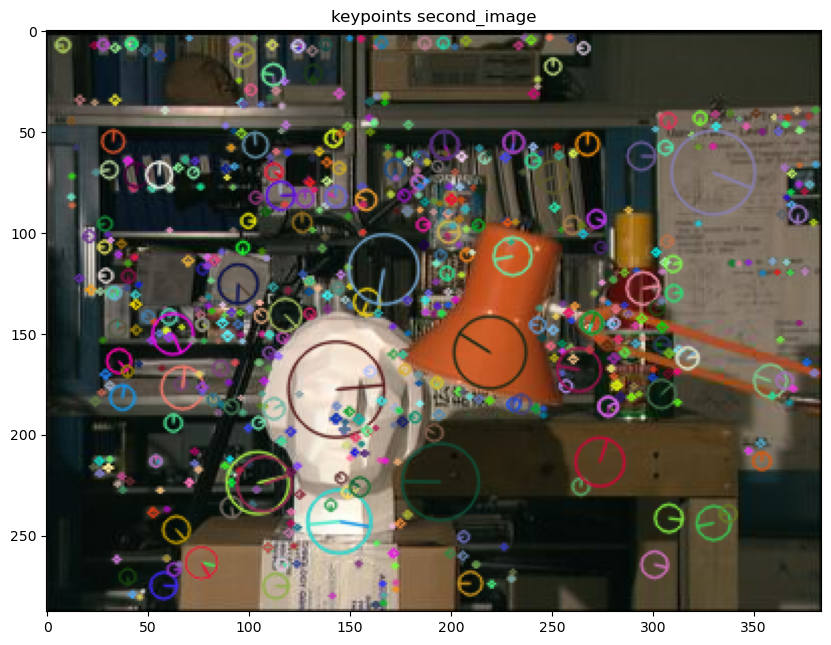

In [7]:
# Try running SIFT
try:
    feature_extractor = cv2.xfeatures2d.SIFT_create()
except:
    print("SIFT not working - Yikes")
 
# Find the keypoints in the images and place descriptors with SIFT
keypoint_l, desc_l = feature_extractor.detectAndCompute(gray_l,None)
keypoint_r, desc_r = feature_extractor.detectAndCompute(gray_r,None)

# Actually draw the keypoints in the image
test_l = cv2.drawKeypoints(rgb_l, keypoint_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
test_r = cv2.drawKeypoints(rgb_r, keypoint_r, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot the images with keypoints identified
#first_image
plt.figure(figsize=figsize)
plt.imshow(test_l)
plt.title("keypoints first_image")
plt.show()
#second_image
plt.figure(figsize=figsize)
plt.imshow(test_r)
plt.title("keypoints second_image")
plt.show()

**Ex 4.4:**
Feature matcher After extracting features from a collection of overlapping or distorted images, match them up by their descriptors either using nearest neighbor matching or a more efficient matching strategy such as a k-d tree.

See whether you can improve the accuracy of your matches using techniques such as the nearest neighbor distance ratio

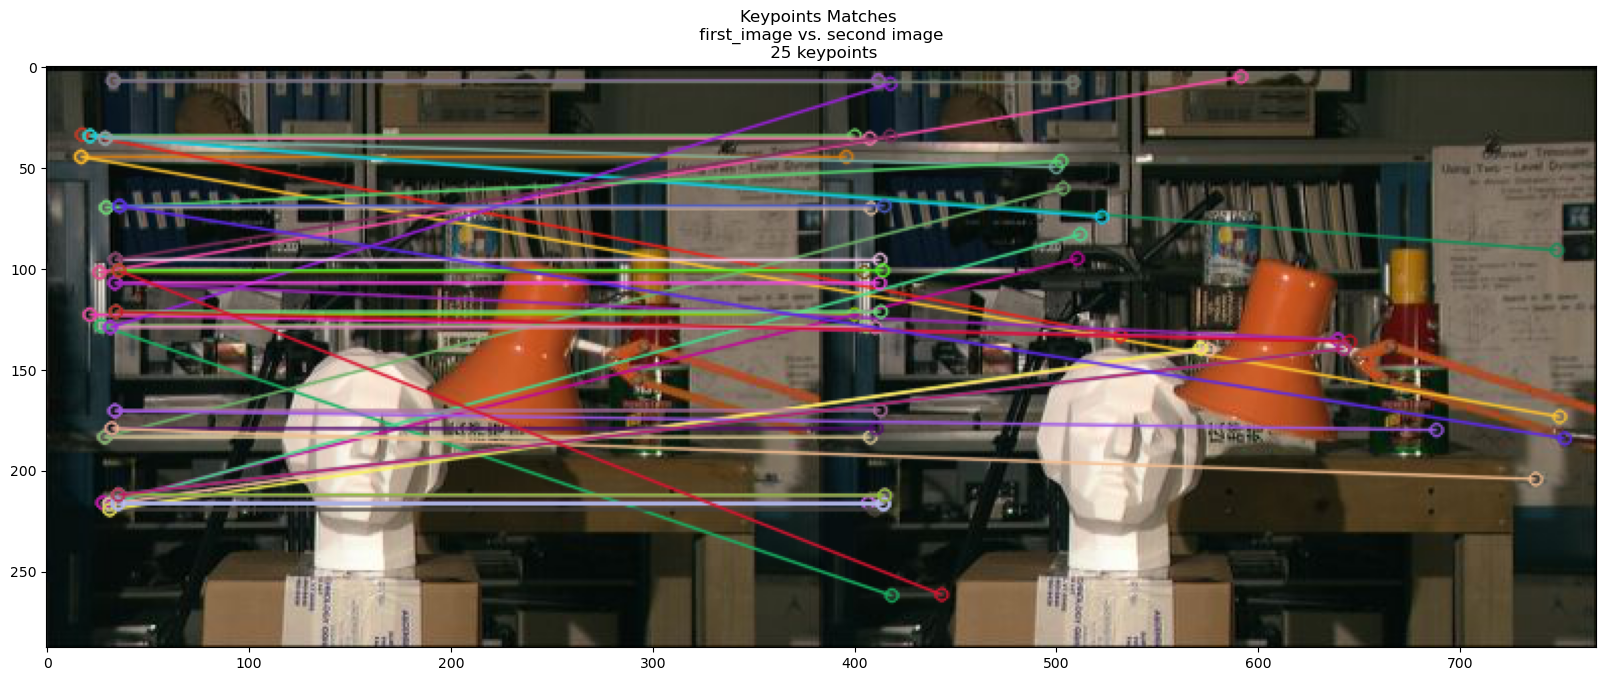

In [9]:
# exercise 4.4 - match up the images
# using nearest neighbor matching
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l,desc_r, k=2)

# Use a ratio test to get good matches
good_match = []
for m in matches:
    if m[0].distance/m[1].distance < 0.8:
        good_match.append(m)
good_match_arr = np.asarray(good_match)

# showing roughly 25 good matches
im_matches = cv2.drawMatchesKnn(rgb_l, keypoint_l, rgb_r, keypoint_r, good_match[0:25], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# show roughly 8 good matches
#im_matches = cv2.drawMatchesKnn(rgb_l, keypoint_l, rgb_r, keypoint_r, good_match[0:8], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20,20))
plt.imshow(im_matches)
plt.title("Keypoints Matches \n first_image vs. second image \n 25 keypoints")
plt.show()

Notes:

* Overall, lots of appropriate keypoints were selected and mapper in this test. Interestingly, the diagonal matches are all off.  



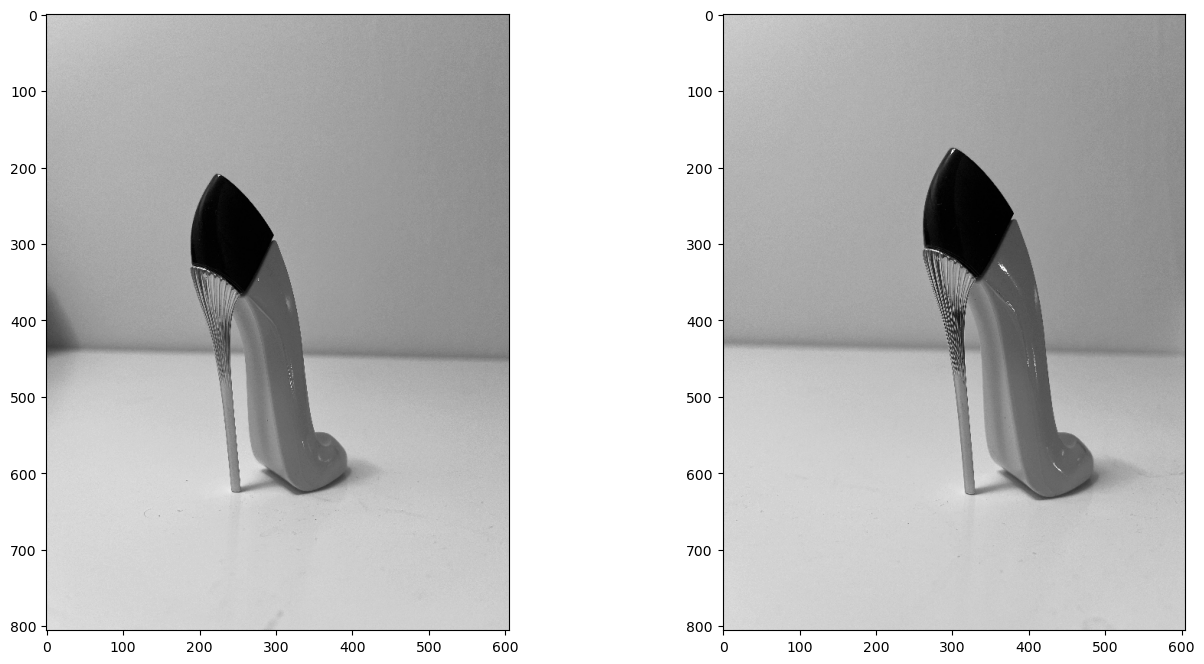

In [11]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread("/Users/kavanamanvi/Desktop/ComputerVision/HW2/ch1.jpeg")  
img2 = cv2.imread("/Users/kavanamanvi/Desktop/ComputerVision/HW2/ch2.jpeg") 

# shrink images
img1 = cv2.resize(img1, None,fx=.2, fy=.2, interpolation = cv2.INTER_CUBIC)
img2 = cv2.resize(img2, None,fx=.2, fy=.2, interpolation = cv2.INTER_CUBIC)


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

In [12]:
# Run SIFT
sift = cv2.xfeatures2d.SIFT_create()

#Get the keypoints
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#Check how many keypoints there are
len(keypoints_1), len(keypoints_2)

(116, 138)

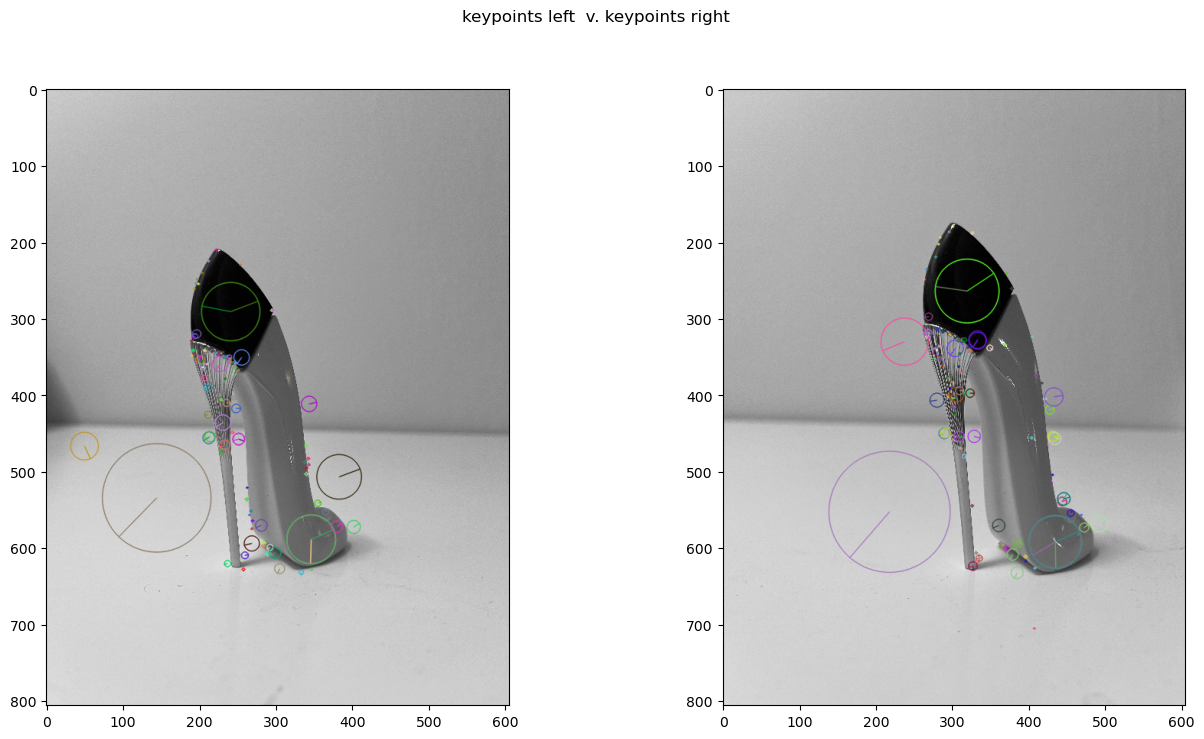

In [13]:
# Actually draw the keypoints in the image
test_1 = cv2.drawKeypoints(img1, keypoints_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
test_2 = cv2.drawKeypoints(img2, keypoints_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot the images with keypoints identified
figure, ax = plt.subplots(1, 2, figsize=(16, 8))
figure.suptitle("keypoints left  v. keypoints right")
ax[0].imshow(test_1)
ax[1].imshow(test_2)

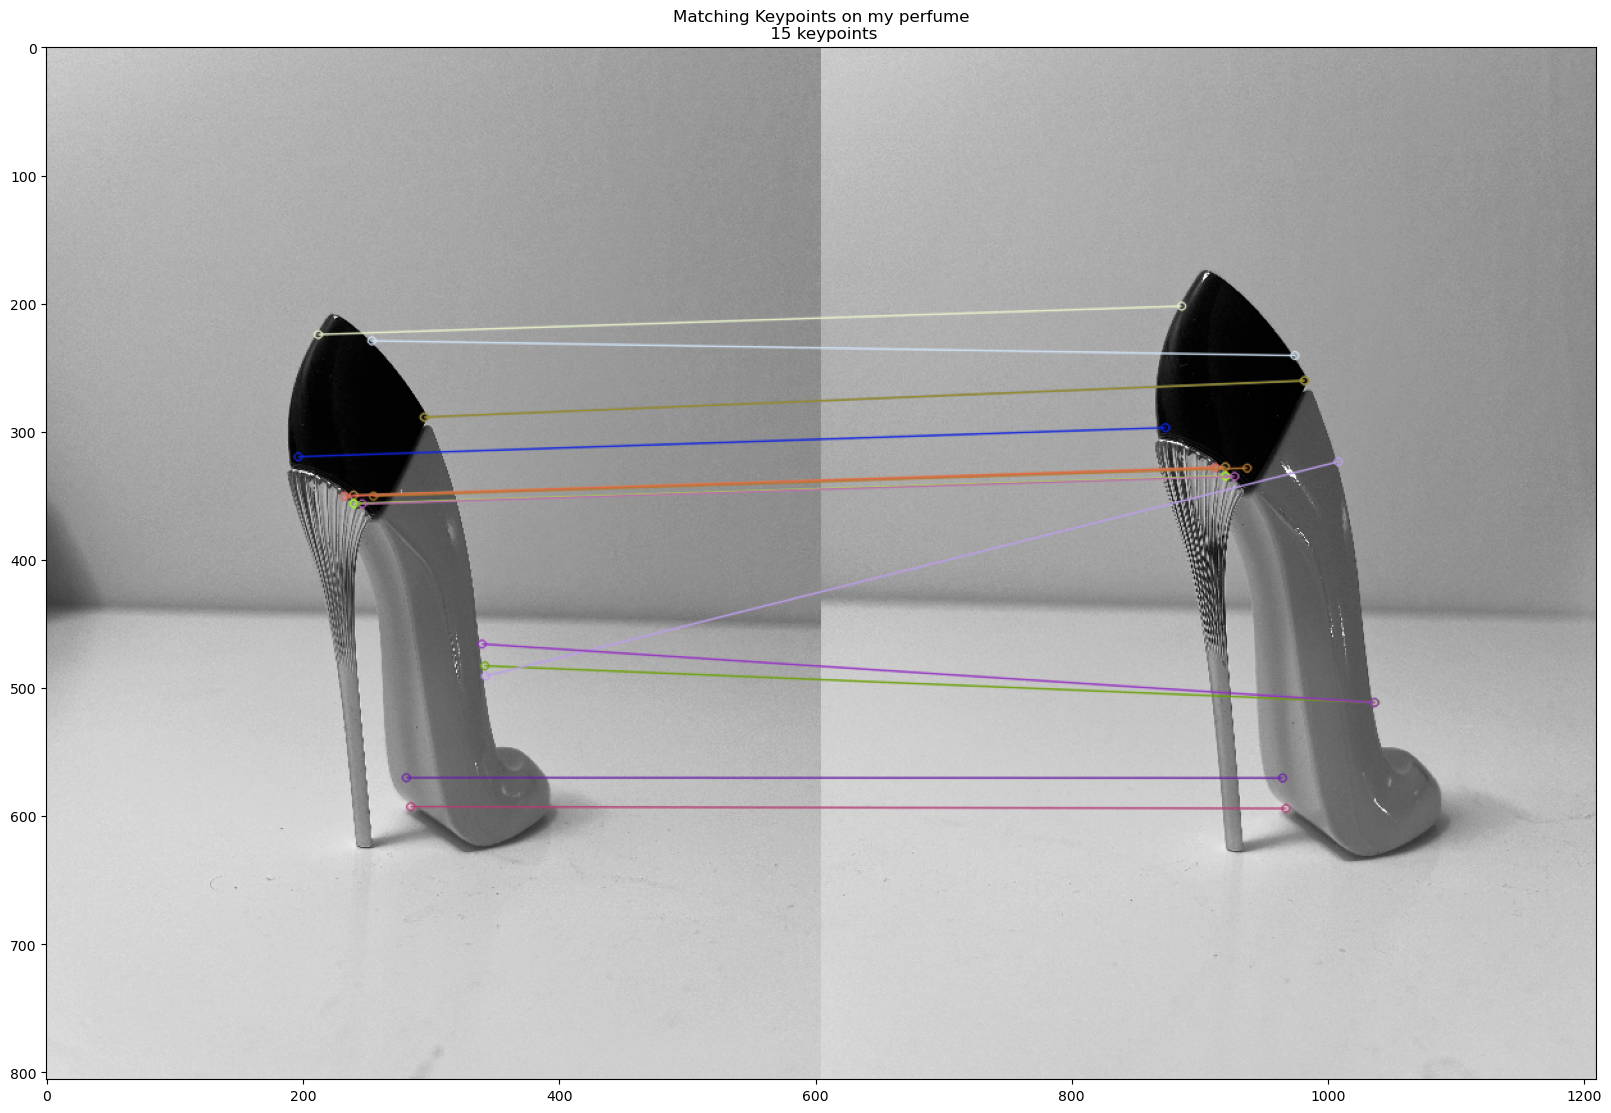

In [14]:
# exercise 4.4 - match up the images
# feature matching top 15 keypoint features detected
figsize=(20,20)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

plt.figure(figsize=(20,20))
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:15], img2, flags=2)
plt.imshow(img3)
plt.title("Matching Keypoints on my perfume\n 15 keypoints")
plt.show()

## Problem 2

Implement programming assignment 1 from Chapter 11 of the Forsyth book.  Choose a stereo pair (or two adjacent frames in a video sequence); first_image and second_image are acceptable.  Pick your 8 points in two different ways: 1) use hand chosen points; 2) use your feature matching from problem 1 above.  Analyze the results of your program: in particular, what differences do you notice between the two fundamental matrices calculated? 

first_image


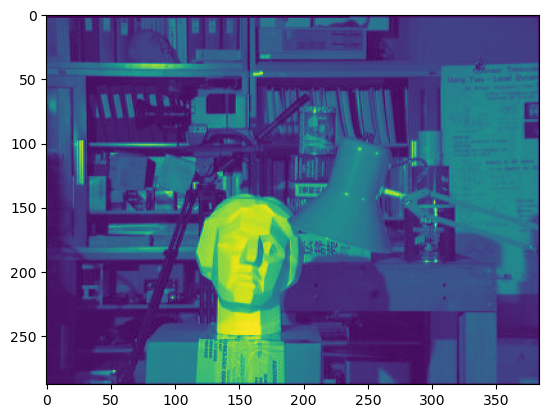

second_image


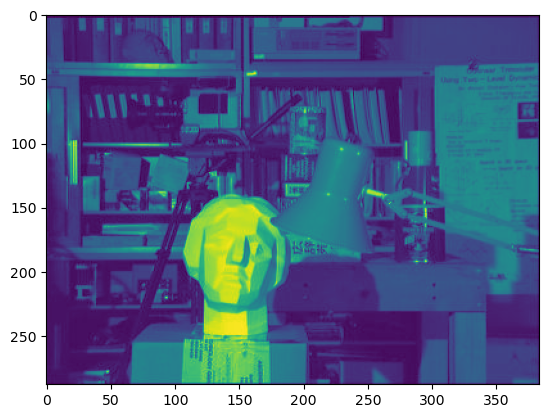

In [17]:
#Display the images
print("first_image")
plt.imshow(gray_l)
plt.show()

print("second_image")
plt.imshow(gray_r)
plt.show()

#setup img1 and img2
img1 = gray_l #queryimage # left image
img2 = gray_r #trainimage # right image

In [18]:
# hand chosen 8 points
handchosen_pts1 = np.array([[ 26, 128], [ 31, 129], [ 34, 121], [ 49, 148], [116,  22], [165,  50], [201,   6], [328,  43]])
handchosen_pts2 = np.array([[ 21, 128],[ 26, 129], [ 29, 121], [ 44, 148], [112,  22], [160,  50], [196,   6], [323,  43]])
#Display arrays
print("handchosen_pts1: \n", handchosen_pts1)
print("handchosen_pts2: \n", handchosen_pts2)

handchosen_pts1: 
 [[ 26 128]
 [ 31 129]
 [ 34 121]
 [ 49 148]
 [116  22]
 [165  50]
 [201   6]
 [328  43]]
handchosen_pts2: 
 [[ 21 128]
 [ 26 129]
 [ 29 121]
 [ 44 148]
 [112  22]
 [160  50]
 [196   6]
 [323  43]]


In [19]:
handchosen_fundamental_matrix, mask = cv2.findFundamentalMat(handchosen_pts1,handchosen_pts2,cv2.FM_LMEDS)
print("Handchosen Fundamental Matrix: \n", handchosen_fundamental_matrix)

Handchosen Fundamental Matrix: 
 [[ 2.13697210e-17 -9.09090909e-03  2.00000000e-01]
 [ 9.09090909e-03  6.21223883e-17 -4.08294571e+00]
 [-2.00000000e-01  4.03749116e+00  1.00000000e+00]]


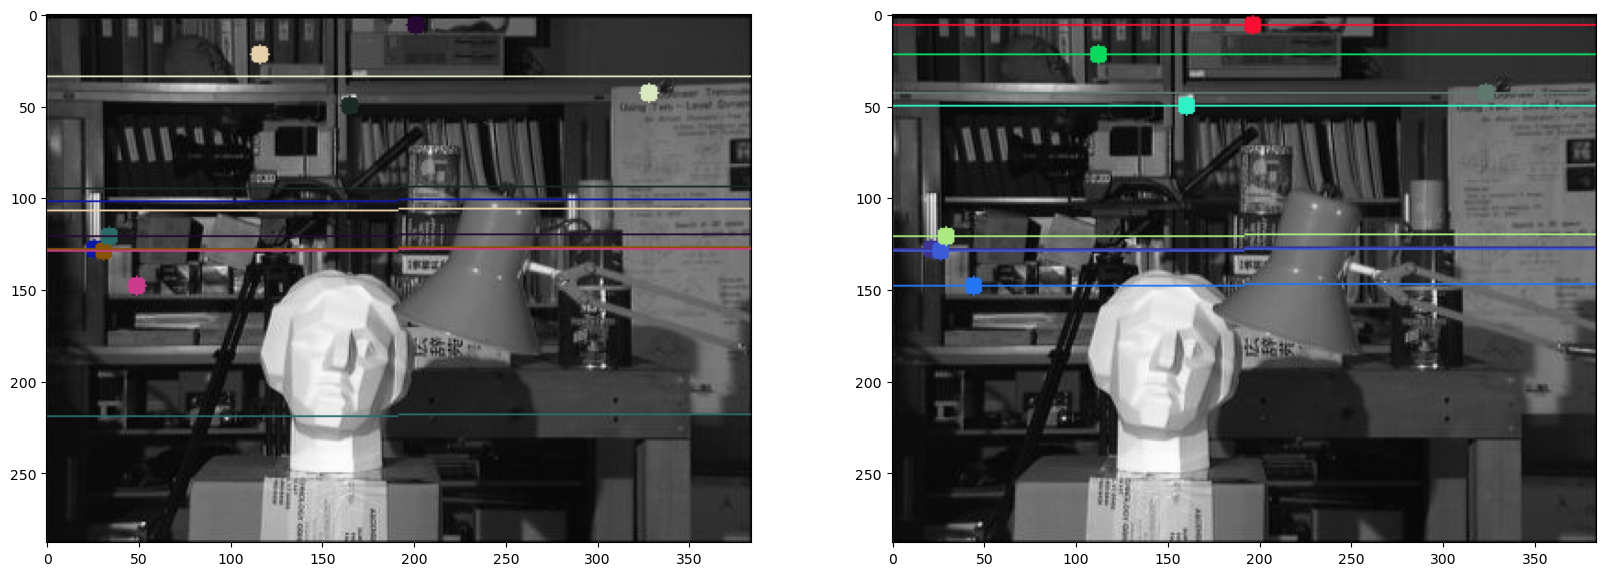

In [38]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image

lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,handchosen_pts1,handchosen_pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(handchosen_pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,handchosen_pts2,handchosen_pts1)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

### 2) Feature Matching keypoint selection

In [24]:
#using feature matching
import cv2
import numpy as np
from matplotlib import pyplot as plt
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# Trying out the KD-Tree as mentioned in the problem statement
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

#run flann
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

#initialize lists to hold points
good = []
pts1 = []
pts2 = []

# ratio test and append keypoints to the lists
for i,(m,n) in enumerate(matches):
  if m.distance < 0.1*n.distance: #<----------- tune down to 0.06 to see 8 epilines. 0.1 gives more points.
    good.append(m)
    pts2.append(kp2[m.trainIdx].pt)
    pts1.append(kp1[m.queryIdx].pt)

In [26]:
# fix format keypoints
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# from the best matches --> find the fundamental matrix
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [30]:
#let's see the point coordinates from the best points. pts1 is from the first_image and pts2 is from the second_image.
print("pts1: ", pts1)
print("pts2: ", pts2)

pts1:  [[ 26 102]
 [ 26 128]
 [ 31 219]
 [ 31 129]
 [ 33 107]
 [ 33  95]
 [ 34 121]
 [ 38  34]
 [ 44 121]
 [ 46   6]
 [ 49 148]
 [ 54 141]
 [ 65  99]
 [ 74 114]
 [ 81 118]
 [ 97   5]
 [101  12]
 [101  12]
 [105  29]
 [109  56]
 [116  22]
 [116  22]
 [118  70]
 [122  81]
 [122  81]
 [134  83]
 [142   7]
 [153 177]
 [156 221]
 [159 228]
 [164  43]
 [164  35]
 [164  35]
 [165  50]
 [165 226]
 [169 198]
 [169 198]
 [182 258]
 [191   6]
 [201   6]
 [291 181]
 [291 181]
 [297 181]
 [328  43]
 [336  41]
 [336  41]]
pts2:  [[ 21 102]
 [ 21 128]
 [ 26 219]
 [ 26 129]
 [ 28 107]
 [ 28  95]
 [ 29 121]
 [ 33  34]
 [ 40 121]
 [ 41   6]
 [ 44 148]
 [ 50 141]
 [ 60  99]
 [ 69 114]
 [ 77 118]
 [ 93   5]
 [ 97  12]
 [ 97  12]
 [101  29]
 [103  56]
 [112  22]
 [112  22]
 [112  70]
 [115  81]
 [115  81]
 [127  83]
 [138   7]
 [143 177]
 [145 221]
 [149 228]
 [159  43]
 [159  35]
 [159  35]
 [160  50]
 [155 226]
 [158 198]
 [158 198]
 [171 258]
 [187   6]
 [196   6]
 [284 181]
 [284 181]
 [289 181]
 [323 

In [32]:
#Display F
print("Fundamental Matrix: \n", F)

Fundamental Matrix: 
 [[ 4.68462799e-21 -9.36925598e-19  7.30691678e-17]
 [ 9.36925598e-19  1.17115700e-20 -1.77840759e-02]
 [-7.55914925e-17  1.77840759e-02  6.66133815e-16]]


In [34]:
#call the opencv drawlines fn
def drawlines(img1,img2,lines,pts1,pts2):
  ''' img1 - image on which we draw the epilines for the points in img2 lines - corresponding epilines '''
  r,c = img1.shape
  img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
  img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
  for r,pt1,pt2 in zip(lines,pts1,pts2):
    color = tuple(np.random.randint(0,255,3).tolist())
    x0,y0 = map(int, [0, -r[2]/r[1] ])
    x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
    img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
    img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
    img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
  return img1,img2

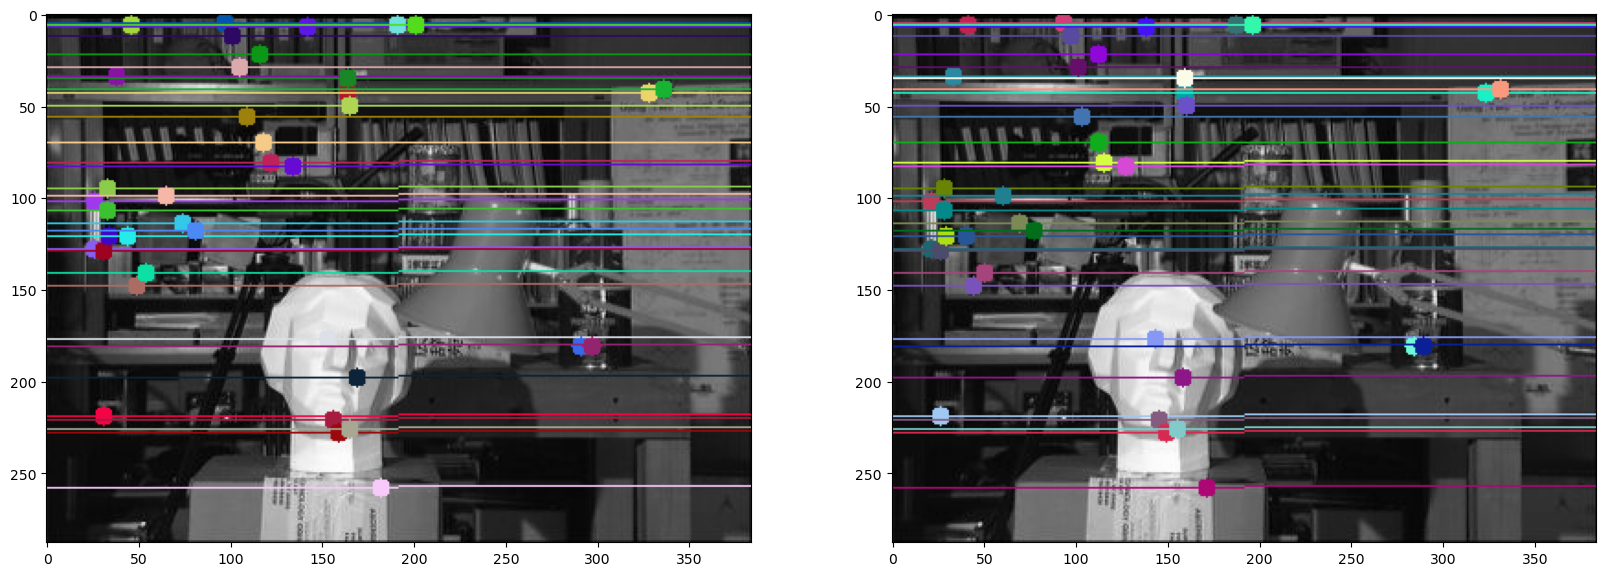

In [36]:
# Find epilines corresponding to points in right image (second image) and drawing its lines on left image

lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

* This actually makes more sense. The epilines are horizontal as the shift in the images is slightly horizontal. 
* These lines do seem to contain a lot of good points, enabling us to narrow our search in any sort of feature mapping application. 

### Analyze differences:

Handchosen Fundamental Matrix: 
* [[ 3.56044788e-19 -9.09090909e-03  2.00000000e-01]
* [ 9.09090909e-03  3.99193823e-16  3.50484077e+02]
* [-2.00000000e-01 -3.50529532e+02  1.00000000e+00]]

vs.

Fundamental Matrix (feature matching algo & more points): 
 * [[ 0.00000000e+00 -5.54656982e-03  1.52832031e-01]
 * [ 5.47027588e-03 -1.58965588e-04  2.18362706e+14]
 * [-1.54296875e-01 -2.18362706e+14  1.00000000e+00]]


Analysis
 * By including more points, the feature matching fundamental matrix should be of a higher quality. I believe that it's results are more accurate. In the opencv textbook it mentioned that the fundamental matrices are sensitive to points being in the same plane. I imagine that the few points I selected were in similar planes. It's almost like the epilines were draw as if the two images were the same. In the feature matching example these lines are not all in the same plane and there are more of them, allowing for the epilines to match the horizontal slight shift between images. These lines are good to check for matching points between the two images. 



